# Dimentionality Reduction No. 3: PCA , Kernel PCA

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA

In [2]:
# Read the data.
data = pd.read_csv('Train_UWu5bXk.csv')

In [3]:
# Read the first lines.
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BAD0988>,
      dtype=object)

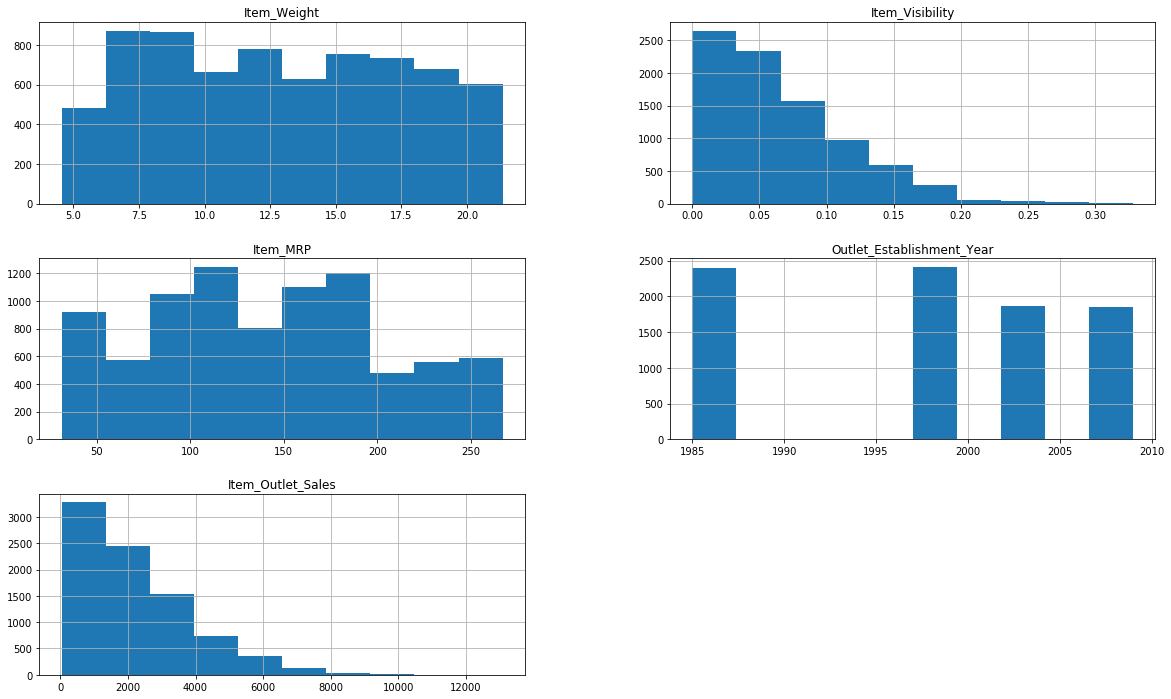

In [4]:
# Plot the histogram of the data.
data.hist(figsize=(20, 12))

In [5]:
# Create a new PCA.
# Reduce four dimension to two dimension (n_component=2).
# Note that we specify the random state.
pca = PCA(n_components=2, random_state=25)

In [6]:
# Make the input data (X).
# The input data consists of the four columns of the original data.
X = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

In [7]:
# Fill the NA values of the 'Item_Weight' column with its mean.
X['Item_Weight'] = X['Item_Weight'].fillna(X['Item_Weight'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Execute the PCA. 
# Learn from the input data.
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=25,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
# Transform the result.
X = pca.transform(X)

In [10]:
# Show the result.
X

array([[108.81103577,  -1.11472194],
       [-92.72746286, -11.27038581],
       [  0.63385467,  -1.14121579],
       ...,
       [-55.86986118,  -6.21878213],
       [-37.86137694, -11.22579548],
       [-65.52296662,   0.79853703]])

In [11]:
# Create a new Kernel PCA.
# Reduce four dimension to two dimension (n_component=2).
# Note that we specify the random state.
kernel_pca = KernelPCA(n_components=2, random_state=25)

In [12]:
# Make the input data (X) for the Kernel PCA.
# The input data consists of the four columns of the original data.
X_kernel_pca = data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

In [13]:
# Fill the NA values of the 'Item_Weight' column with its mean.
X_kernel_pca['Item_Weight'] = X_kernel_pca['Item_Weight'].fillna(X_kernel_pca['Item_Weight'].mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Execute the Kernel PCA. 
# Learn from the input data.
kernel_pca.fit(X_kernel_pca)

In [ ]:
# Transform the result.
X_kernel_pca = pca.transform(X_kernel_pca)

In [ ]:
# Show the result.
X_kernel_pca

In [ ]:
# Import the required libraries for regression and data preprocessing and preparing.
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Make the target data (y).
y = data['Item_Outlet_Sales']

In [ ]:
# Determine the size of the input data.
len(X)

In [ ]:
# Determine the size of the target data.
np.shape(y)

In [ ]:
# Specify the train and test inputs and targets.
# Note that we specify the random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=25)

In [ ]:
# Create a new catboost.
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=8, eval_metric='MAE')

In [ ]:
# Learn from the data.
catboost_regressor.fit(X_train, y_train, [], eval_set=(X_test, y_test), plot=True)

In [ ]:
# Calculate the standard deviation of the target.
y.std()